<figure>
  <IMG SRC="Logo.png"  WIDTH=150 ALIGN="right">
</figure>

## Projections of mean sea level and tides<br>
### Six Dutch stations
<b>Prepared by: H.G. Voortman</b>


<figure>
    <IMG SRC="https://www.python.org/static/community_logos/python-powered-w-200x80.png"  WIDTH=100 ALIGN="right">
</figure>

#### Description
- Showing examples of effects in the North Sea

#### References
- Provided in report

#### Packages

In [1]:
# General packages
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sq
import numpy as np
#import scipy.signal as signal
#import datetime as dt
import hvec_stat.general_fit as gf
#import hvec_stat.gof as gof
import hvec_stat.support as sup
import models as mdl

In [2]:
# Settings
plt.rcParams['axes.grid'] = True
figsize = (20, 18)

#### Connect databases and import data

##### Processed data Rijkswaterstaat

In [3]:
# Connect database
conn_str = os.getenv('DATAPATH') + 'RWS_processed.db'
cnxn = sq.connect(conn_str, detect_types = True)

In [4]:
pd.read_sql('SELECT * FROM sqlite_master', cnxn)

,type,name,tbl_name,rootpage,sql
0,table,const_yr,const_yr,2,"CREATE TABLE ""const_yr"" (\n""naam"" TEXT,\n ""le..."
1,index,ix_const_yr_naam_level_1,const_yr,3,"CREATE INDEX ""ix_const_yr_naam_level_1""ON ""con..."


In [5]:
# Read table with observed water levels; complete years only
sql = (
    "SELECT * "
    "FROM 'const_yr' "
    "WHERE naam IN ('Delfzijl', 'Harlingen', "
    "'Den Helder', 'IJmuiden',  "
    "'Hoek van Holland', 'Vlissingen') "
    "AND (count>650) "
#    "AND (set == 'Ftested3') "
)
df = pd.read_sql(sql, cnxn) #.groupby('YEAR').mean()

In [6]:
cnxn.close()

In [7]:
df.columns = df.columns.str.replace('_ampl', '')
df.columns

Index(['naam', 'level_1', 'z0', 'zmean', 'count', 'M2', 'S2', 'Rsq_adj',
       'MHWS', 'MLWS', 'MHWN', 'MLWN', 'year', 'year_start', 'set', 'M4', 'O1',
       'K2', 'K1', 'P1', 'N2', 'M6', 'MU2', 'L2', '2MS6', 'MS4', 'NU2', 'SA'],
      dtype='object')

In [8]:
#df = df[np.abs(df['z0']) < 1e2]
#df = df[np.abs(df['M2']) < 1e2]
df = df[df['year'].between(1945, 2005)]

In [9]:
names = [
    'Delfzijl',
    'Harlingen',
    'Den Helder',
    'IJmuiden',
    'Hoek van Holland',
    'Vlissingen'
]

In [10]:
df = df[df['set'] == 'Ftested3']

#### Show graphs

0.07039982168964892
0.21689348851991913
0.07974453189835569
0.25110831083069574
0.23097105369190477
0.2513712402452306


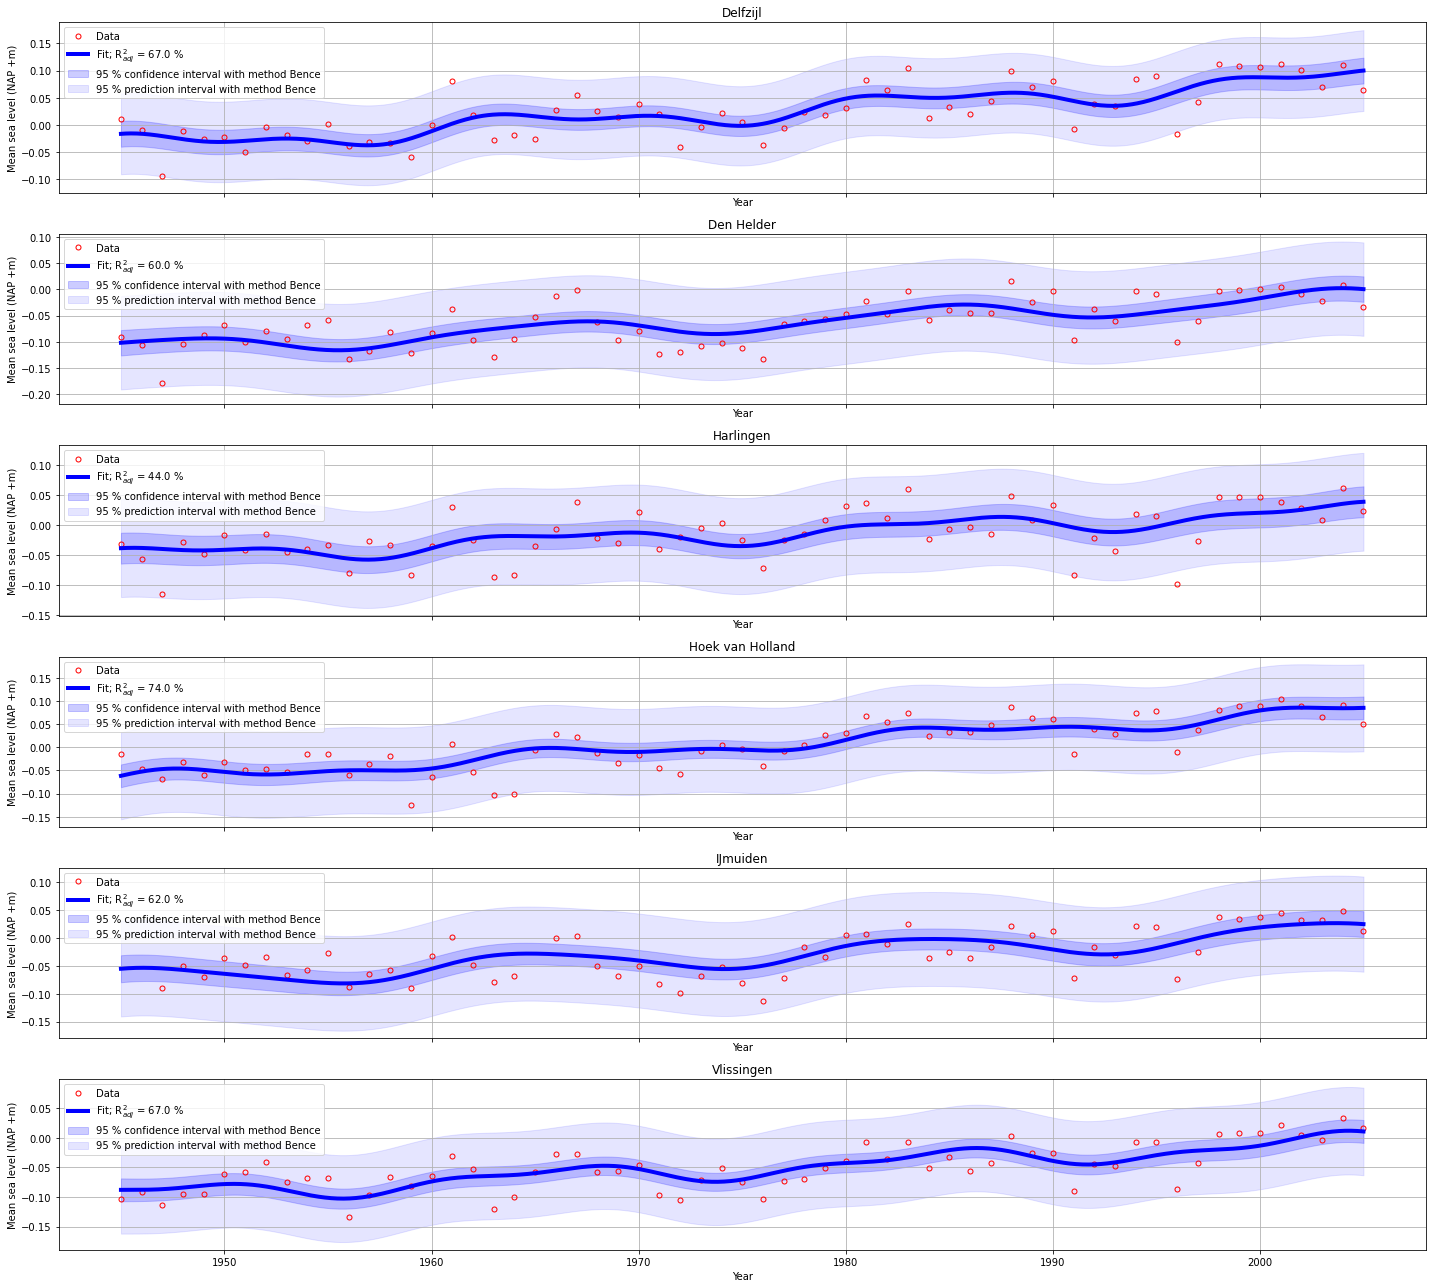

In [11]:
xgr = np.linspace(1945, 2005, 1000)

fig, ax = plt.subplots(nrows = 6, ncols = 1, sharex = True, sharey = False, figsize = figsize)

for i, nm in enumerate(df['naam'].unique()):
    data = df[df['naam'] == nm]
    plt.subplot(6,1,i+1)
    gf.plot_general_fit(
        mdl.model3c, xgr, data['year'], data['z0'],
        pred_int = True,
        xlabel = 'Year', ylabel = 'Mean sea level (NAP +m)',
        title = nm, size = (13,5), method = 'Bence'
    )
    plt.savefig(r'../pics/fit_z0.jpg')
    

#### Testing models

In [12]:
res = df[['naam', 'year', 'z0']].groupby('naam').apply(
    lambda df: sup.Ftest_classic_direct(
        f = mdl.model1,
        k = 2,
        xdata = df['year'],
        ydata = df['z0'], method = 'Classic'
    )['p'] * 100
)
res

naam
Delfzijl            8.104960e-09
Den Helder          7.473739e-06
Harlingen           5.867969e-03
Hoek van Holland    1.744114e-11
IJmuiden            4.633597e-05
Vlissingen          2.205515e-07
dtype: float64

In [13]:
res = df[['naam', 'year', 'z0']].groupby('naam').apply(
    lambda df: sup.Ftest_reduced_direct(
        mdl.model2, mdl.model1,
        kfull = 3, kred = 2,
        xdata = df['year'],
        ydata = df['z0'], method = 'Bence'
    )['p'] * 100
)
res

0.19078610753659894
0.3073183614231065
0.15547909192591192
0.2971634467648508
0.28835058648143286
0.32955858861016396


naam
Delfzijl            43.976307
Den Helder          53.533967
Harlingen           96.135574
Hoek van Holland    29.302021
IJmuiden             7.611443
Vlissingen          19.410264
dtype: float64

In [14]:
res = df[['naam', 'year', 'z0']].groupby('naam').apply(
    lambda df: sup.Ftest_reduced_direct(
        mdl.model3c, mdl.model1,
        kfull = 6, kred = 2,
        xdata = df['year'],
        ydata = df['z0'], method = 'Bence'
    )['p'] * 100
)
res

0.07039982168964892
0.21689348851991913
0.07974453189835569
0.25110831083069574
0.23097105369190477
0.2513712402452306


naam
Delfzijl             8.507099
Den Helder          29.336335
Harlingen           35.537509
Hoek van Holland    52.151350
IJmuiden            16.708788
Vlissingen          19.852444
dtype: float64

In [15]:
res = df[['naam', 'year', 'z0']].groupby('naam').apply(
    lambda df: sup.Ftest_reduced_direct(
        mdl.model4, mdl.model1,
        kfull = 7, kred = 2,
        xdata = df['year'],
        ydata = df['z0'], method = 'Bence'
    )['p'] * 100
)
res

0.0685602119714945
0.21629075424795632
0.07234840038148782
0.2392972675817175
0.1387321663650879
0.22697217340681858


naam
Delfzijl            14.579677
Den Helder          43.065417
Harlingen           44.080082
Hoek van Holland    58.566846
IJmuiden             5.134504
Vlissingen          20.936751
dtype: float64

In [16]:
res = df[['naam', 'year', 'z0']].groupby('naam').apply(
    lambda df: sup.Ftest_reduced_direct(
        mdl.model4, mdl.model2,
        kfull = 7, kred = 3,
        xdata = df['year'],
        ydata = df['z0'], method = 'Bence'
    )['p'] * 100
)
res

0.0685602119714945
0.21629075424795632
0.07234840038148782
0.2392972675817175
0.1387321663650879
0.22697217340681858


naam
Delfzijl            11.785441
Den Helder          35.923708
Harlingen           31.431458
Hoek van Holland    64.208771
IJmuiden            15.589970
Vlissingen          28.447519
dtype: float64

#### End script
Prepared by HVEC lab, 2022